In [159]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-poster")
from sklearn import svm
import pandas as pd
import os, errno
import scipy as sc
from scipy import io
import glob

In [3]:
# get a plot of all of the x and y and IR positions for one video

In [109]:
# read all the data the infrared data

path_ = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Infrared'
sensor_path = [(os.path.join(root, name), name) for root,_,file in os.walk(path_)
                for name in file
                if name.endswith('.mat')]
sensor_path

[('/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Infrared/L0.1_c-3_m12.mat',
  'L0.1_c-3_m12.mat'),
 ('/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Infrared/L0.1_c-3_m2.mat',
  'L0.1_c-3_m2.mat'),
 ('/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Infrared/L0.1_c-3_m20.mat',
  'L0.1_c-3_m20.mat'),
 ('/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Infrared/L0.1_c-3_m21.mat',
  'L0.1_c-3_m21.mat'),
 ('/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Infrared/L0.1_c-3_m22.mat',
  'L0.1_c-3_m22.mat'),
 ('/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Infrared/L0.1_c-3_m23.mat',
  'L0.1_c-3_m23.mat'),
 ('/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Infrared/L0.1_c-3_m24.mat',
  'L0.1_c-3_m24.mat'),
 ('/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Infrared/L0.1_c-3_m25.mat',
  'L0.1_c-3_m25.mat'),
 ('/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Infrared/L0.1_c-3_m5.mat',
  'L0.1_c-3_m5.mat'),
 ('/Users/Maha

In [24]:
outpath_ = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Method_Fig/'
outpath_fig = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Method_Fig/'

try:
    os.makedirs(outpath_fig)
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
direc2 = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_4'
IR_data_files = [file for file in os.listdir(direc2)]

In [61]:
IR_values = []
for moth in sensor_path:    
    sensor = io.loadmat(moth[0])
    sensor_fname = moth[1]
    In = 1
    Out = 3
    _IR = sensor['IR']
    print(_IR[1:3])
    IR = sensor['IR'][In:Out]
    IR_values.append(IR)
IR_values

[[0.4189453 ]
 [0.42216796]]
[[0.28681642]
 [0.28681642]]
[[0.4640625 ]
 [0.46083984]]
[[0.50273436]
 [0.50273436]]
[[0.52851564]
 [0.5317383 ]]
[[0.36416015]
 [0.36416015]]
[[0.37060547]
 [0.3738281 ]]
[[0.37060547]
 [0.3770508 ]]
[[0.49951172]
 [0.50273436]]
[[0.41572267]
 [0.41572267]]
[[0.29003906]
 [0.29003906]]
[[0.37060547]
 [0.37060547]]
[[0.4801758]
 [0.4801758]]
[[0.48339844]
 [0.48339844]]
[[0.47695312]
 [0.47373047]]
[[0.4705078]
 [0.4705078]]
[[0.56396484]
 [0.56396484]]
[[0.515625]
 [0.515625]]
[[0.36416015]
 [0.36416015]]
[[0.5768555]
 [0.5768555]]


[array([[0.4189453 ],
        [0.42216796]], dtype=float32), array([[0.28681642],
        [0.28681642]], dtype=float32), array([[0.4640625 ],
        [0.46083984]], dtype=float32), array([[0.50273436],
        [0.50273436]], dtype=float32), array([[0.52851564],
        [0.5317383 ]], dtype=float32), array([[0.36416015],
        [0.36416015]], dtype=float32), array([[0.37060547],
        [0.3738281 ]], dtype=float32), array([[0.37060547],
        [0.3770508 ]], dtype=float32), array([[0.49951172],
        [0.50273436]], dtype=float32), array([[0.41572267],
        [0.41572267]], dtype=float32), array([[0.29003906],
        [0.29003906]], dtype=float32), array([[0.37060547],
        [0.37060547]], dtype=float32), array([[0.4801758],
        [0.4801758]], dtype=float32), array([[0.48339844],
        [0.48339844]], dtype=float32), array([[0.47695312],
        [0.47373047]], dtype=float32), array([[0.4705078],
        [0.4705078]], dtype=float32), array([[0.56396484],
        [0.56396484]],

In [121]:
direc = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_5/'

outpath = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/'
outpath_figg = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Figures_Methods/'
dFrame = pd.read_csv(outpath + 'AllMoths_AllTrials.csv')

def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return(unique_list)


name = 'L50_c-3_m6'
name_path = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Infrared/L50_c-3_m6.mat'

# need to make a list that has the info including the relevant names and the relevant IR values. Lol wait I only need 1 fucking graph
i = 0
sensor = io.loadmat(name_path)
_IR = sensor['IR']
In = unique(list(dFrame[(dFrame.name == name)  & (dFrame.In_Frame.notnull())].In_Frame))
Out = unique(list(dFrame[(dFrame.name == name) & (dFrame.In_Frame.notnull())].Out_Frame))
In_out = list(zip(In,Out))
Moth_InOut = list(In_out)
IR_values = []
for element in Moth_InOut:
        start_frame = Moth_InOut[i][0]
        end_frame = Moth_InOut[i][1]
        IR = _IR[start_frame:end_frame]
        IR_values.append(IR)
        i+=1
len(IR_values)

8

In [147]:
IR_values_flat = [item for sublist in IR_values for item in sublist]
len(IR_values_flat)
df = pd.read_csv('/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/' + name + '!Centroid_Data.csv')
X_pos = list(df['X_position'])
Y_pos = list(df['Y_position'])
framez = list(df['FrameNumber'])

# new_df = (pd.DataFrame({'X_position' : X_pos, 'Y_position' : Y_pos, 'FrameNumber' : framez, 'IR': IR_values_flat}))
# # # print(Lightlevel + '\t' + "has a total of" + '\t'+ str(ctr) + '\t' + "moths")
# new_df.to_csv(outpath + name + "Centroid_IR_Data.csv")

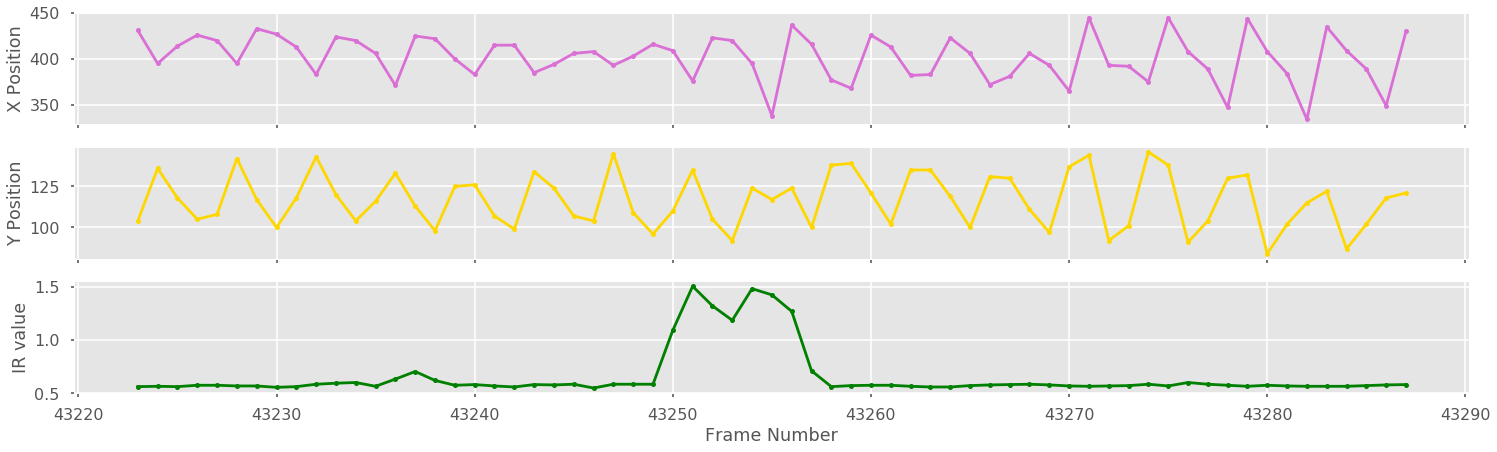

In [162]:
outpath_figg = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Method_Fig/'
fig, ax = plt.subplots(3,1 , figsize = (25,7), sharex = True)
ax[0].plot(framez[10875:10940], X_pos[10875:10940], 'o-',color ='orchid', markersize = 5)
ax[2].set_xlabel('Frame Number')
ax[1].plot(framez[10875:10940], Y_pos[10875:10940], 'o-' ,color ='gold', markersize = 5)
ax[2].plot(framez[10875:10940], IR_values_flat[10875:10940], 'o-' ,color ='green', markersize = 5)
ax[0].set_ylabel('X Position')
ax[1].set_ylabel('Y Position')
ax[2].set_ylabel('IR value')
plt.savefig(outpath_figg + 'Methods_Plot.png')

In [145]:
Lightlevel = ['L0.1', 'L50']

outpathe = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/!/'

for Lightlevel in Lightlevel:
    print(Lightlevel)
    Light_specific_file = glob.glob(outpathe + '*Centroid_Data*.csv')
    print(Light_specific_file)
       
    # get the data together and save as single dataset
    
    
    df2=[]
    df3=[]
    df4=[]
    df5=[]
    df6 = []

    ctr = 0
    for fpath in Light_specific_file:
        df = pd.read_csv(fpath)
#         print(fpath)
        FrameNum= df['FrameNumber']
        trialNum = df.index
        fname = os.path.basename(fpath)[:-18]
#         print(fname)
        names = [fname]*len(trialNum)
        X_pos = df['X_position']
        Y_pos = df['Y_position']
        
        df6.extend(IR_values_flat)
        df2.extend(FrameNum)
        df3.extend(names)
        df4.extend(X_pos)
        df5.extend(Y_pos)
        ctr+=1
#         print(ctr)
print(len(X_pos), len(Y_pos), len(IR_values_flat), len(names), len(FrameNum))
#     new_df = (pd.DataFrame({ 'FrameNum': df2, 'name' : df3, 'X_pos' : df4, 'Y_pos' : df5, 'IR': IR_values_flat}))
#     new_df.to_csv(outpathe + "!!!AllMoth_Centroid.csv")
    
    
    

L0.1
['/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/!/L0.1_c-3_m12!Centroid_Data.csv', '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/!/L0.1_c-3_m20!Centroid_Data.csv', '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/!/L0.1_c-3_m21!Centroid_Data.csv', '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/!/L0.1_c-3_m22!Centroid_Data.csv', '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/!/L0.1_c-3_m23!Centroid_Data.csv', '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/!/L0.1_c-3_m24!Centroid_Data.csv', '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/!/L0.1_c-3_m25!Centroid_Data.csv', '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/!/L0.1_c-3_m8!Centroid_Data.csv', '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/!/L50_c-3_m10!Centroid_Data.csv', '/Users/Mahad/D